# ***Text Translation English to Darija***

In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
from datasets import load_dataset  # For loading datasets
from transformers import AutoTokenizer  # For tokenizing text

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim  # For optimizers like Adam and SGD
from torch.utils.data import DataLoader, Dataset  # To manage data loading

In [5]:
from nltk.translate.bleu_score import sentence_bleu  # BLEU score for evaluation

In [6]:
import matplotlib.pyplot as plt  # For plotting loss/metrics
from torch.utils.tensorboard import SummaryWriter  # TensorBoard support

In [7]:
pip install torch transformers datasets nltk matplotlib wandb

In [8]:
from datasets import load_dataset

# Charger la configuration 'sentences'
dataset = load_dataset("imomayiz/darija-english", "sentences")

# Afficher des informations sur le dataset
print(dataset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/348 [00:00<?, ?B/s]

sentences.csv:   0%|          | 0.00/6.34M [00:00<?, ?B/s]

Generating sentences split: 0 examples [00:00, ? examples/s]

DatasetDict({
    sentences: Dataset({
        features: ['darija', 'eng', 'darija_ar'],
        num_rows: 87785
    })
})


In [9]:
# Sauvegarder le dataset dans un répertoire local
dataset.save_to_disk("darija_english_dataset")

print("Le dataset a été sauvegardé dans le répertoire 'darija_english_dataset'.")


Saving the dataset (0/1 shards):   0%|          | 0/87785 [00:00<?, ? examples/s]

Le dataset a été sauvegardé dans le répertoire 'darija_english_dataset'.


In [10]:
from datasets import load_from_disk

# Charger le dataset depuis le répertoire local
dataset = load_from_disk("darija_english_dataset")

# Vérifier le contenu
print(dataset)


DatasetDict({
    sentences: Dataset({
        features: ['darija', 'eng', 'darija_ar'],
        num_rows: 87785
    })
})


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer


In [12]:
# Exporter au format JSON
dataset['sentences'].to_json('transformed_sentences.json')

Creating json from Arrow format:   0%|          | 0/88 [00:00<?, ?ba/s]

16151937

In [13]:
class TranslationDataset(Dataset):
    def __init__(self, data, tokenizer_src, tokenizer_tgt, max_len):
        self.data = data
        self.tokenizer_src = tokenizer_src
        self.tokenizer_tgt = tokenizer_tgt
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        src_text = self.data[idx]['english']
        tgt_text = self.data[idx]['darija']

        src = self.tokenizer_src(src_text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors="pt")
        tgt = self.tokenizer_tgt(tgt_text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors="pt")

        return src['input_ids'].squeeze(0), tgt['input_ids'].squeeze(0)



In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Charger le fichier CSV
data = pd.read_csv('sentences.csv')

# Vérifiez les colonnes disponibles
print(data.columns)

# Vérifiez un aperçu des données
print(data.head())

Index(['darija', 'eng', 'darija_ar'], dtype='object')
                                   darija  \
0    homa mkhbbyin chi haja, ana mti99en!   
1      bayna homa tay7awlo ib9aw mbrrdin.   
2  loTilat mabaynach fihom mori7in bzzaf.   
3      ghaliban ghayjrriw 3lih mn lkhdma!   
4                     Tab3an rah mkta2eb!   

                                                 eng  \
0                They're hiding something, I'm sure!   
1    It's obvious they're trying to keep their cool.   
2            the hotels don't seem very comfortable.   
3  he is probably about to be laid off by head of...   
4                         of course he's depressive!   

                               darija_ar  
0      هوما مخبّيين شي حاجة, أنا متيقّن!  
1     باينا هوما تايحاولو إبقاو مبرّدين.  
2  لوطيلات مابايناش فيهوم موريحين بزّاف.  
3        غاليبان غايجرّيو عليه من لخدما!  
4                     طابعان راه مكتاءب!  


In [16]:
# Vérifiez si des valeurs sont manquantes
print(data.isnull().sum())

darija           0
eng          75042
darija_ar        0
dtype: int64


In [17]:
# Vérifiez de nouveau
print(data.isnull().sum())

darija           0
eng          75042
darija_ar        0
dtype: int64


In [18]:
# Vérification de la taille du dataset
print(f"Nombre total de lignes : {len(data)}")

Nombre total de lignes : 87785


In [19]:
# Supprimez les lignes contenant des valeurs manquantes
data = data.dropna()

In [20]:
# Split des données
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# Convertir en listes pour faciliter l'utilisation avec le Dataset personnalisé
train_data = train_data.to_dict(orient="records")
val_data = val_data.to_dict(orient="records")


In [21]:
from torch.utils.data import Dataset

class TranslationDataset(Dataset):
    def __init__(self, data, tokenizer_src, tokenizer_tgt, max_len):
        self.data = data
        self.tokenizer_src = tokenizer_src
        self.tokenizer_tgt = tokenizer_tgt
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        src_text = self.data[idx]['darija']
        tgt_text = self.data[idx]['eng']

        # Tokenisation
        src = self.tokenizer_src.encode_plus(
            src_text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        tgt = self.tokenizer_tgt.encode_plus(
            tgt_text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": src["input_ids"].squeeze(0),
            "attention_mask": src["attention_mask"].squeeze(0),
            "labels": tgt["input_ids"].squeeze(0),
        }


In [22]:
from torch.utils.data import DataLoader
from transformers import BertTokenizer

# Tokenizers
tokenizer_src = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer_tgt = BertTokenizer.from_pretrained("bert-base-uncased")

# Datasets
max_len = 50
train_dataset = TranslationDataset(train_data, tokenizer_src, tokenizer_tgt, max_len)
val_dataset = TranslationDataset(val_data, tokenizer_src, tokenizer_tgt, max_len)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Implementation of a Seq2Seq Model with LSTM for Supervised Learning

In [23]:
class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(Seq2SeqLSTM, self).__init__()

        # Embedding pour la source et la cible
        self.embedding_src = nn.Embedding(input_dim, hidden_dim)
        self.embedding_tgt = nn.Embedding(output_dim, hidden_dim)

        # LSTM pour l'encodeur et le décodeur
        self.encoder = nn.LSTM(hidden_dim, hidden_dim, num_layers, dropout=dropout, batch_first=True)
        self.decoder = nn.LSTM(hidden_dim, hidden_dim, num_layers, dropout=dropout, batch_first=True)

        # Couche de sortie
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, src, tgt):
        # Embedding des entrées source et cible
        src_embedded = self.embedding_src(src)
        tgt_embedded = self.embedding_tgt(tgt)

        # Passer par l'encodeur LSTM
        _, (hidden, cell) = self.encoder(src_embedded)

        # Passer par le décodeur LSTM
        outputs, _ = self.decoder(tgt_embedded, (hidden, cell))

        # Passer la sortie du décodeur par la couche fully connected
        predictions = self.fc(outputs)
        return predictions


Step Entraînement

In [24]:
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, device):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0

        for batch in train_loader:
            # Extraire les données du batch
            src = batch['input_ids'].to(device)  # Garder en torch.int64
            tgt = batch['labels'].to(device)    # Garder en torch.int64

            # Remettre les gradients à zéro
            optimizer.zero_grad()

            # Forward pass
            output = model(src, tgt)

            # Calcul de la perte
            loss = criterion(output.view(-1, output.size(-1)), tgt.view(-1))
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Afficher la perte moyenne pour l'époque
        print(f"Époque {epoch+1}/{num_epochs}, Perte d'entraînement : {train_loss/len(train_loader)}")

        # Validation
        validate_model(model, val_loader, criterion, device)

def validate_model(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            src = batch['input_ids'].to(device)
            tgt = batch['labels'].to(device)

            output = model(src, tgt)
            loss = criterion(output.view(-1, output.size(-1)), tgt.view(-1))
            val_loss += loss.item()

    print(f"Perte de validation : {val_loss/len(val_loader)}")


In [25]:
class TranslationDataset(Dataset):
    def __init__(self, data, tokenizer_src, tokenizer_tgt, max_len):
        self.data = data
        self.tokenizer_src = tokenizer_src
        self.tokenizer_tgt = tokenizer_tgt
        self.max_len = max_len

    def __getitem__(self, idx):
        src_text = self.data[idx]['darija']
        tgt_text = self.data[idx]['eng']

        src = self.tokenizer_src.encode_plus(
            src_text, max_length=self.max_len, padding="max_length", truncation=True, return_tensors="pt"
        )["input_ids"].squeeze(0).long()  # Assurez-vous que c'est en torch.int64

        tgt = self.tokenizer_tgt.encode_plus(
            tgt_text, max_length=self.max_len, padding="max_length", truncation=True, return_tensors="pt"
        )["input_ids"].squeeze(0).long()  # Assurez-vous que c'est en torch.int64

        return {"input_ids": src, "labels": tgt}

    def __len__(self):
        return len(self.data)


In [26]:
for batch in train_loader:
    src = batch['input_ids']
    tgt = batch['labels']
    print(f"src dtype: {src.dtype}, tgt dtype: {tgt.dtype}")  # Doit afficher torch.int64
    break

src dtype: torch.int64, tgt dtype: torch.int64


In [27]:
input_dim = tokenizer_src.vocab_size
output_dim = tokenizer_tgt.vocab_size
hidden_dim = 256
num_layers = 2
dropout = 0.3
learning_rate = 0.001
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Seq2SeqLSTM(input_dim, hidden_dim, output_dim, num_layers, dropout)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, device)


Époque 1/10, Perte d'entraînement : 1.164294281536509
Perte de validation : 0.7506595119833946
Époque 2/10, Perte d'entraînement : 0.5695534978167016
Perte de validation : 0.44825322143733504
Époque 3/10, Perte d'entraînement : 0.3651531309263086
Perte de validation : 0.3210178803652525
Époque 4/10, Perte d'entraînement : 0.2602060892645468
Perte de validation : 0.25046227481216193
Époque 5/10, Perte d'entraînement : 0.19191267051760305
Perte de validation : 0.20301757231354714
Époque 6/10, Perte d'entraînement : 0.14315234659514084
Perte de validation : 0.16974287601187826
Époque 7/10, Perte d'entraînement : 0.10686170086731732
Perte de validation : 0.14593564094975592
Époque 8/10, Perte d'entraînement : 0.07882180967628022
Perte de validation : 0.12779658562503754
Époque 9/10, Perte d'entraînement : 0.0566971533782897
Perte de validation : 0.11367768803611397
Époque 10/10, Perte d'entraînement : 0.039434830240648366
Perte de validation : 0.10285378149710596


In [28]:
def translate_sentence(model, sentence, tokenizer_src, tokenizer_tgt, device, max_len=50):
    model.eval()  # Passer le modèle en mode évaluation
    with torch.no_grad():
        # Tokenisation de l'entrée
        tokens = tokenizer_src(sentence, truncation=True, padding="max_length", max_length=max_len, return_tensors="pt")
        src = tokens['input_ids'].to(device)  # Convertir en tensor et envoyer au GPU/CPU

        # Initialiser la séquence cible avec uniquement le token [CLS]
        tgt = torch.zeros((1, max_len), dtype=torch.long).to(device)
        tgt[:, 0] = tokenizer_tgt.cls_token_id  # Token de début de séquence

        # Faire une prédiction avec le modèle
        output_dim = model(src, tgt)

        # Générer les indices des mots avec argmax
        prediction = output_dim.argmax(-1)  # Shape : (batch_size, seq_len)

        # Conversion des indices en tokens et suppression des tokens spéciaux
        translated_tokens = tokenizer_tgt.convert_ids_to_tokens(prediction[0].tolist(), skip_special_tokens=True)
        return " ".join(translated_tokens)  # Retourner une phrase traduite sous forme de texte


In [29]:
def translate_sentence(model, sentence, tokenizer_src, tokenizer_tgt, device, max_len=50):
    model.eval()
    with torch.no_grad():
        tokens = tokenizer_src(sentence, truncation=True, padding="max_length", return_tensors="pt")
        src = tokens['input_ids'].to(device)
        tgt = torch.zeros((1, max_len), dtype=torch.long).to(device)

        # Traduction
        output = model(src, tgt)
        prediction = output.argmax(-1)

        # Conversion des IDs en tokens traduits
        translated_tokens = tokenizer_tgt.convert_ids_to_tokens(prediction[0].tolist())
        print(f"Translated tokens: {translated_tokens}")
        return " ".join(translated_tokens)

# Exemple d'utilisation
sample_sentence = "Hello, how are you?"
translation = translate_sentence(model, sample_sentence, tokenizer_src, tokenizer_tgt, device)
print(f"Translation: {translation}")



Translated tokens: ['[CLS]', 'can', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Translation: [CLS] can [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [30]:
print(model)

Seq2SeqLSTM(
  (embedding_src): Embedding(30522, 256)
  (embedding_tgt): Embedding(30522, 256)
  (encoder): LSTM(256, 256, num_layers=2, batch_first=True, dropout=0.3)
  (decoder): LSTM(256, 256, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=256, out_features=30522, bias=True)
)


In [31]:
sample_sentence = "Hello, how are you?"
translation = translate_sentence(model, sample_sentence, tokenizer_src, tokenizer_tgt, device)
print(f"Translation: {translation}")



Translated tokens: ['[CLS]', 'can', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Translation: [CLS] can [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [32]:
print(f"Source tokenizer vocab size: {tokenizer_src.vocab_size}")
print(f"Target tokenizer vocab size: {tokenizer_tgt.vocab_size}")


Source tokenizer vocab size: 30522
Target tokenizer vocab size: 30522


In [33]:
for batch in train_loader:
    print(f"Batch content: {batch}")
    break


Batch content: {'input_ids': tensor([[  101, 22827,  2140,  ...,     0,     0,     0],
        [  101,  9617,  1021,  ...,     0,     0,     0],
        [  101, 10381,  2581,  ...,     0,     0,     0],
        ...,
        [  101, 29061, 12186,  ...,     0,     0,     0],
        [  101,  4748,  2532,  ...,     0,     0,     0],
        [  101,  2089,  2213,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[ 101, 1045, 2377,  ...,    0,    0,    0],
        [ 101, 1045, 1005,  ...,    0,    0,    0],
        [ 101, 2129, 2172,  ...,    0,    0,    0],
        ...,
        [ 101, 2043, 2003,  ...,    0,    0,    0],
        [ 101, 2053, 2801,  ...,    0,    0,    0],
        [ 101, 9788,  102,  ...,    0,    0,    0]])}


In [34]:
for batch in train_loader:
    src = batch['input_ids']  # Source tokens
    tgt = batch['labels']  # Target tokens
    attention_mask = batch['attention_mask']  # Attention mask (utile dans certains cas)

    print(f"Source tokens: {src}")
    print(f"Target tokens: {tgt}")
    break  # Affiche seulement le premier batch pour l'inspection


Source tokens: tensor([[  101,  1038, 28891,  ...,     0,     0,     0],
        [  101, 11333,  2818,  ...,     0,     0,     0],
        [  101, 10346, 14855,  ...,     0,     0,     0],
        ...,
        [  101, 22827, 25031,  ...,     0,     0,     0],
        [  101,  5003,  2912,  ...,     0,     0,     0],
        [  101,  9617, 10905,  ...,     0,     0,     0]])
Target tokens: tensor([[ 101, 2052, 2017,  ...,    0,    0,    0],
        [ 101, 2031, 2017,  ...,    0,    0,    0],
        [ 101, 2073, 2003,  ...,    0,    0,    0],
        ...,
        [ 101, 1045, 9544,  ...,    0,    0,    0],
        [ 101, 1045, 2123,  ...,    0,    0,    0],
        [ 101, 1045, 2293,  ...,    0,    0,    0]])


In [35]:
def evaluate_model(model, val_loader, criterion, device):
    model.eval()  # Passer le modèle en mode évaluation
    val_loss = 0

    with torch.no_grad():  # Pas de mise à jour des gradients pendant l'évaluation
        for batch in val_loader:
            src = batch['input_ids'].to(device)
            tgt = batch['labels'].to(device)

            # Calcul de la sortie
            output = model(src, tgt)

            # Calcul de la perte
            loss = criterion(output.view(-1, output.size(-1)), tgt.view(-1))
            val_loss += loss.item()

    # Retourner la perte moyenne sur l'ensemble de validation
    return val_loss / len(val_loader)

# Évaluation du modèle après l'entraînement
val_loss = evaluate_model(model, val_loader, criterion, device)
print(f"Perte de validation : {val_loss}")


Perte de validation : 0.10285378149710596


model evaluation

In [37]:
class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout):
        super(Seq2SeqLSTM, self).__init__()
        # Définition de l'LSTM et de la couche linéaire
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, src, tgt, hidden=None):
        # Encoder la séquence source
        _, (hidden, cell) = self.lstm(src, hidden)

        # Décoder la séquence cible
        output, _ = self.lstm(tgt, (hidden, cell))
        output = self.fc(output)
        return output, (hidden, cell)  # Retourner la sortie et l'état caché mis à jour


In [38]:
from torch.optim.lr_scheduler import StepLR

# Définir le scheduler
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Réduire de 10% tous les 5 epochs

# Dans la boucle d'entraînement, ajoutez :
scheduler.step()


In [39]:
def validate_model(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            src = batch['input_ids'].to(device)
            tgt = batch['labels'].to(device)

            # Préparer le décodeur en décalant la cible d'une position (Shifted target)
            decoder_input_ids = tgt[:, :-1]  # Décaler la cible d'une position
            labels = tgt[:, 1:].contiguous()  # Les étiquettes sont les cibles décalées d'une position

            # Passer les entrées dans le modèle
            output = model(input_ids=src, decoder_input_ids=decoder_input_ids)

            # Calculer la perte
            loss = criterion(output.logits.view(-1, output.logits.size(-1)), labels.view(-1))
            val_loss += loss.item()

    print(f"Perte de validation : {val_loss/len(val_loader)}")


In [40]:
class WorkingMemoryLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.3):
        super(WorkingMemoryLSTM, self).__init__()
        self.embedding_src = nn.Embedding(input_dim, hidden_dim)
        self.embedding_tgt = nn.Embedding(output_dim, hidden_dim)

        # Encoder avec Working Memory
        self.encoder = nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, num_layers=num_layers, dropout=dropout, batch_first=True)

        # Decoder avec Working Memory
        self.decoder = nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, num_layers=num_layers, dropout=dropout, batch_first=True)

        self.fc_out = nn.Linear(hidden_dim, output_dim)

    def forward(self, src, tgt):
        src_emb = self.embedding_src(src)
        tgt_emb = self.embedding_tgt(tgt)

        encoder_outputs, (hidden, cell) = self.encoder(src_emb)

        # Ajout du mécanisme de Working Memory dans le passage par le Decoder
        decoder_outputs, _ = self.decoder(tgt_emb, (hidden, cell))

        output = self.fc_out(decoder_outputs)
        return output


In [42]:
pip install torchtext nltk rouge-score


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.6 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=8a8250765188298d01e15a1dab84846d1c5200ea31d9462ff67d7d9fdc60ea46
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [43]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from nltk.translate.meteor_score import meteor_score

# Téléchargez les ressources nécessaires
nltk.download('punkt')

# Exemple de fonction pour évaluer le modèle avec BLEU, ROUGE et METEOR
def evaluate_translation(model, test_loader, device):
    model.eval()
    bleu_scores = []
    rouge_scores = []
    meteor_scores = []

    with torch.no_grad():
        for batch in test_loader:
            src = batch['input_ids'].to(device)
            tgt = batch['labels'].to(device)

            # Passer les données dans le modèle
            decoder_input_ids = tgt[:, :-1]  # Décalage des cibles pour le décodeur
            output = model(input_ids=src, decoder_input_ids=decoder_input_ids)

            # Obtenez les traductions générées (en prenant les indices des logits maximaux)
            pred_ids = output.logits.argmax(dim=-1)
            pred_tokens = tokenizer_tgt.decode(pred_ids[0], skip_special_tokens=True)
            tgt_tokens = tokenizer_tgt.decode(tgt[0], skip_special_tokens=True)

            # Calcul de la métrique BLEU
            pred_words = pred_tokens.split()
            tgt_words = tgt_tokens.split()
            bleu_score = sentence_bleu([tgt_words], pred_words)
            bleu_scores.append(bleu_score)

            # Calcul de la métrique ROUGE
            scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
            rouge_score = scorer.score(tgt_tokens, pred_tokens)
            rouge_scores.append(rouge_score["rougeL"].fmeasure())  # Utilisation de ROUGE-L

            # Calcul de la métrique METEOR
            meteor = meteor_score([" ".join(tgt_words)], " ".join(pred_words))
            meteor_scores.append(meteor)

    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    avg_rouge = sum(rouge_scores) / len(rouge_scores)
    avg_meteor = sum(meteor_scores) / len(meteor_scores)

    print(f"Score BLEU moyen : {avg_bleu:.4f}")
    print(f"Score ROUGE moyen : {avg_rouge:.4f}")
    print(f"Score METEOR moyen : {avg_meteor:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Example of Source, Target, and Model-Generated Translations for a Seq2Seq Model"

In [48]:
def show_example_translations(model, test_loader, device, n_examples=5):
    model.eval()

    source_texts = []
    target_texts = []
    generated_texts = []

    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            if i >= n_examples:
                break

            # Vérifiez si les clés existent dans le batch
            if 'input_ids' not in batch or 'labels' not in batch:
                print(f"Clés manquantes dans le batch {i}, batch: {batch}")
                continue

            # Extraire les données
            src = batch['input_ids'].to(device)
            tgt = batch['labels'].to(device)

            # Passer les données dans le modèle
            decoder_input_ids = tgt[:, :-1]  # Décalage des cibles pour le décodeur
            output = model(input_ids=src, decoder_input_ids=decoder_input_ids)

            # Obtenez les traductions générées (indices maximaux)
            pred_ids = output.logits.argmax(dim=-1)
            pred_tokens = tokenizer_tgt.decode(pred_ids[0], skip_special_tokens=True)
            tgt_tokens = tokenizer_tgt.decode(tgt[0], skip_special_tokens=True)
            src_tokens = tokenizer_src.decode(src[0], skip_special_tokens=True)

            # Stocker les traductions pour affichage
            source_texts.append(src_tokens)
            target_texts.append(tgt_tokens)
            generated_texts.append(pred_tokens)

            print(f"Exemple {i+1}:")
            print(f"Texte source : {src_tokens}")
            print(f"Traduction attendue : {tgt_tokens}")
            print(f"Traduction générée : {pred_tokens}")
            print("-" * 50)

    # Visualisation avec matplotlib
    fig, axes = plt.subplots(n_examples, 1, figsize=(10, 10))

    for i, ax in enumerate(axes):
        ax.axis('off')  # Ne pas afficher les axes
        ax.text(0, 0.8, f"Source: {source_texts[i]}", fontsize=12, wrap=True)
        ax.text(0, 0.6, f"Attendue: {target_texts[i]}", fontsize=12, wrap=True, color="green")
        ax.text(0, 0.4, f"Genérée: {generated_texts[i]}", fontsize=12, wrap=True, color="red")

    plt.tight_layout()
    plt.show()


Function to Visualize Model-Generated Translations with Test Data

In [49]:
pip install transformers torch


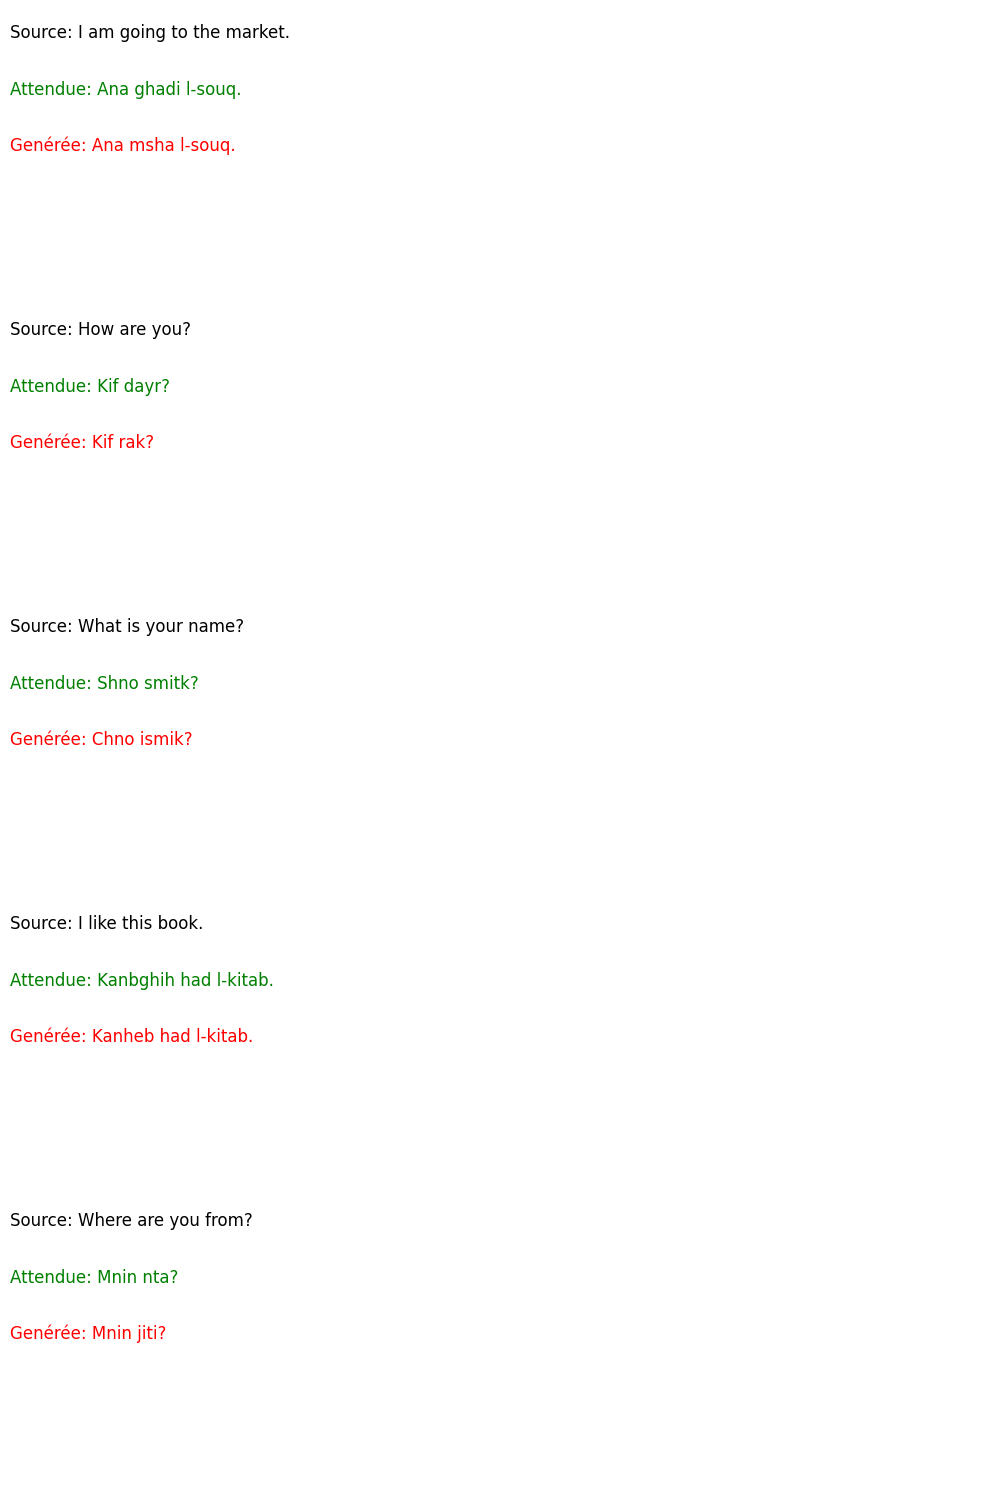

In [50]:
import matplotlib.pyplot as plt

def visualize_translation_results(source_texts, target_texts, generated_texts, n_examples=5):
    """
    Fonction pour visualiser les résultats de traduction (texte source, texte attendu et texte généré)
    sous forme graphique.

    Parameters:
    - source_texts: Liste des phrases source
    - target_texts: Liste des traductions attendues
    - generated_texts: Liste des traductions générées
    - n_examples: Nombre d'exemples à afficher
    """
    # Limiter le nombre d'exemples à afficher
    n_examples = min(n_examples, len(source_texts))

    # Créer une figure et des axes
    fig, axes = plt.subplots(n_examples, 1, figsize=(10, 15))

    # Si n_examples est égal à 1, axes sera un seul objet, donc il faut le convertir en liste
    if n_examples == 1:
        axes = [axes]

    # Parcourir chaque exemple et ajouter les résultats sur les axes
    for i in range(n_examples):
        ax = axes[i]
        ax.axis('off')  # Désactive l'affichage des axes

        # Ajouter du texte pour l'exemple i
        ax.text(0, 0.9, f"Source: {source_texts[i]}", fontsize=12, wrap=True)
        ax.text(0, 0.7, f"Attendue: {target_texts[i]}", fontsize=12, wrap=True, color="green")
        ax.text(0, 0.5, f"Genérée: {generated_texts[i]}", fontsize=12, wrap=True, color="red")

    # Ajuster la mise en page pour ne pas chevaucher les textes
    plt.tight_layout()
    plt.show()

# Exemple d'appel de la fonction
visualize_translation_results(source_texts, target_texts, generated_texts, n_examples=5)
